# **02 - DataCleaning**

## Objectives

* Check for missing values in the dataset
* Address missing values in the dataset
* Implement the data cleaning process

## Inputs

* outputs/datasets/collection/HousePricesRecords.csv

## Outputs

* outputs/datasets/cleaned/train_set_cleaned.csv
* outputs/datasets/cleaned/test_set_cleaned.csv
* outputs/datasets/cleaned/HousePricesCleaned.csv

## Additional Comments

* The decision to impute or drop variables with missing data should be made carefully because both options can significantly impact the quality and integrity of your model.


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/property-value-maximizer/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/property-value-maximizer'

Uses pandas library to load dataset into DataFrames df and displays the first 10 rows of the dataset.

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/HousePricesRecords.csv")
df.head(10)

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000
5,796,566.0,1.0,No,732,GLQ,64,NaN,480,Unf,...,85.0,0.0,30,5,5,796,NaN,1993,1995,143000
6,1694,0.0,3.0,Av,1369,GLQ,317,NaN,636,RFn,...,75.0,186.0,57,5,8,1686,NaN,2004,2005,307000
7,1107,983.0,3.0,Mn,859,ALQ,216,NaN,484,NaN,...,NaN,240.0,204,6,7,1107,NaN,1973,1973,200000
8,1022,752.0,2.0,No,0,Unf,952,NaN,468,Unf,...,51.0,0.0,0,5,7,952,NaN,1931,1950,129900
9,1077,0.0,2.0,No,851,GLQ,140,NaN,205,RFn,...,50.0,0.0,4,6,5,991,NaN,1939,1950,118000


Identifies and extracts the names of columns in the DataFrame df that contain missing (NaN) values.

In [5]:
columns_with_missing_values = df.columns[df.isna().sum() > 0].to_list()
columns_with_missing_values

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtExposure',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

Returns the number of elements in the columns_with_missing_values list.

In [6]:
len(columns_with_missing_values)

10

Summary only for the columns in columns_with_missing_values.

In [7]:
df[columns_with_missing_values].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtExposure   1422 non-null   object 
 3   BsmtFinType1   1315 non-null   object 
 4   EnclosedPorch  136 non-null    float64
 5   GarageFinish   1225 non-null   object 
 6   GarageYrBlt    1379 non-null   float64
 7   LotFrontage    1201 non-null   float64
 8   MasVnrArea     1452 non-null   float64
 9   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(3)
memory usage: 114.2+ KB


If columns_with_missing_values exist, generate a minimal data profile report using the ydata_profiling library. If no columns with missing data are found, print a message indicating there are no columns with missing values.

In [8]:
from ydata_profiling import ProfileReport

if columns_with_missing_values:
    profile = ProfileReport(df=df[columns_with_missing_values], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no columns with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Analyzes missing data in a DataFrame by calculating the number of missing values and the percentage of missing data for each column. Creates a new DataFrame containing the count of missing values, the percentage of missing data, and the data type for each column. This new DataFrame is sorted by the percentage of missing data in descending order and filtered to include only columns with missing data.

In [9]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

In [10]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,235,16.10,object
BsmtFinType1,145,9.93,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
BsmtExposure,38,2.60,object
MasVnrArea,8,0.55,float64


Visualizes the impact of data cleaning by comparing the distribution of specified variables in original and cleaned datasets. It generates bar plots for categorical variables and histograms for numerical ones, to assess the effect of data cleaning visually.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


sns.set(style="whitegrid")

def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):
    """
    Function to visualize data cleaning effect
    """
    flag_count = 1

    # Identify categorical variables
    categorical_variables = df_original.select_dtypes(exclude=['number']).columns

    # Loop through each variable in the list provided
    for var in variables_applied_with_method:
        print("\n=====================================================================================")
        print(f"* Distribution Effect Analysis After Data Cleaning Method on variable: {var}")

        if var in categorical_variables:
            # For categorical variables, create a bar plot
            df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var]})
            df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_cleaned[var]})
            dfAux = pd.concat([df1, df2], axis=0)
            dfAux.reset_index(drop=True, inplace=True)  # Reset the index to avoid duplicates

            fig, axes = plt.subplots(figsize=(15, 5))
            sns.countplot(data=dfAux, x="Value", hue="Type", palette=['#1f77b4', "#ff7f0e"])
            axes.set_title(f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()
            plt.show()
            print(f"Displaying bar plot for categorical variable: {var}")

        else:
            # For numerical variables, create histograms
            fig, axes = plt.subplots(figsize=(10, 5))
            sns.histplot(data=df_original, x=var, color="#1f77b4", label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#ff7f0e", label='Cleaned', kde=True, element="step", ax=axes)
            axes.set_title(f"Distribution Plot {flag_count}: {var}")
            plt.legend()
            plt.show()
            print(f"Displaying histogram for numerical variable: {var}")

        plt.close(fig)
        flag_count += 1

Splits a DataFrame into training and testing sets for machine learning purposes, where TrainSet contains 80% of the data and TestSet contains 20%.

In [12]:
from sklearn.model_selection import train_test_split
TrainSet, TestSet, _, __ = train_test_split(
                                        df,
                                        df['SalePrice'],
                                        test_size=0.2,
                                        random_state=42)

print(f"TrainSet shape: {TrainSet.shape} \nTestSet shape: {TestSet.shape}")

TrainSet shape: (1168, 24) 
TestSet shape: (292, 24)


Evaluates and prints information about missing data in the TrainSet DataFrame. The number of variables with missing data is printed, followed by the details of these variables. Additionally, it prints the names of all columns present in the TrainSet DataFrame.

In [13]:
df_missing_data = EvaluateMissingData(TrainSet)
print(f"* There are {df_missing_data.shape[0]} variables with missing data \n")
print(df_missing_data)

print(f"TrainSet columns: {TrainSet.columns}")

* There are 10 variables with missing data 

               RowsWithMissingData  PercentageOfDataset DataType
EnclosedPorch                 1059                90.67  float64
WoodDeckSF                    1047                89.64  float64
LotFrontage                    217                18.58  float64
GarageFinish                   186                15.92   object
BsmtFinType1                   116                 9.93   object
BedroomAbvGr                    80                 6.85  float64
GarageYrBlt                     64                 5.48  float64
2ndFlrSF                        64                 5.48  float64
BsmtExposure                    28                 2.40   object
MasVnrArea                       6                 0.51  float64
TrainSet columns: Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
 

Remove columns EnclosedPorch and WoodDeckSF, from the TrainSet DataFrame. They both have an extreme amount of missing data.

In [14]:
from feature_engine.selection import DropFeatures

variables_to_drop=['EnclosedPorch' , 'WoodDeckSF']
imputer = DropFeatures(features_to_drop=variables_to_drop)
df_method = imputer.fit_transform(TrainSet)

for i in variables_to_drop:
    print(i in df_method.columns.to_list())

False
False


Applies mean imputation to the numerical variables 'LotFrontage' and 'BedroomAbvGr' in the dataset TrainSet using MeanMedianImputer. The cleaned dataset df_method is passed to the DataCleaningEffect function, which visualizes the impact of imputation by generating histograms for numerical variables.


* Distribution Effect Analysis After Data Cleaning Method on variable: LotFrontage


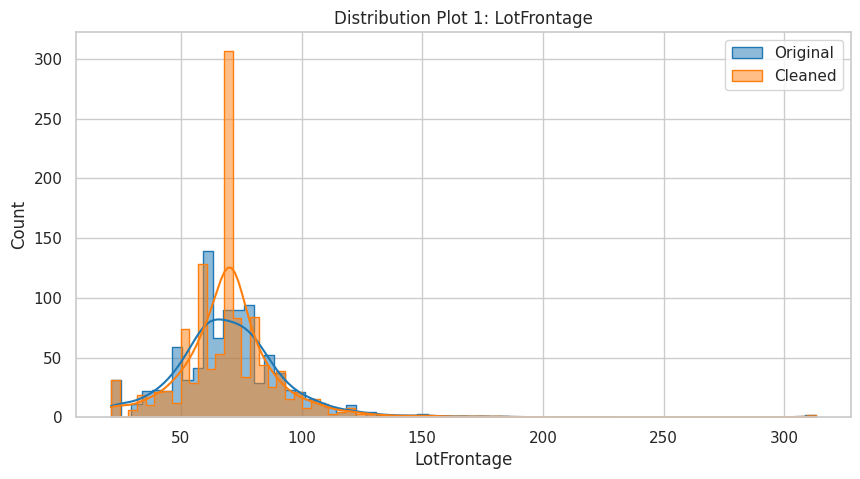

Displaying histogram for numerical variable: LotFrontage

* Distribution Effect Analysis After Data Cleaning Method on variable: BedroomAbvGr


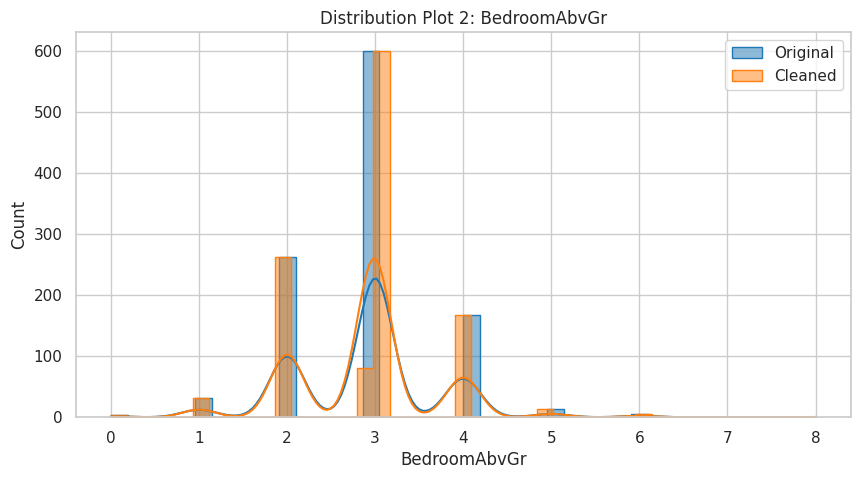

Displaying histogram for numerical variable: BedroomAbvGr


In [15]:
from feature_engine.imputation import MeanMedianImputer

variables_mean = ['LotFrontage' , 'BedroomAbvGr']
imputer = MeanMedianImputer(imputation_method='mean', variables=variables_mean)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_mean)

Applies median imputation to the numerical variables '2ndFlrSF' and 'MasVnrArea' in the dataset TrainSet using MeanMedianImputer. The cleaned dataset df_method is passed to the DataCleaningEffect function, which visualizes the impact of imputation by generating histograms for numerical variables.


* Distribution Effect Analysis After Data Cleaning Method on variable: 2ndFlrSF


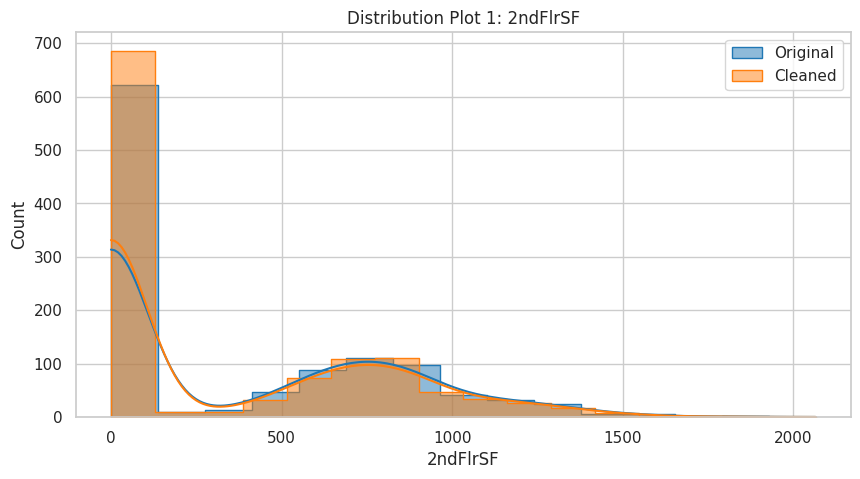

Displaying histogram for numerical variable: 2ndFlrSF

* Distribution Effect Analysis After Data Cleaning Method on variable: MasVnrArea


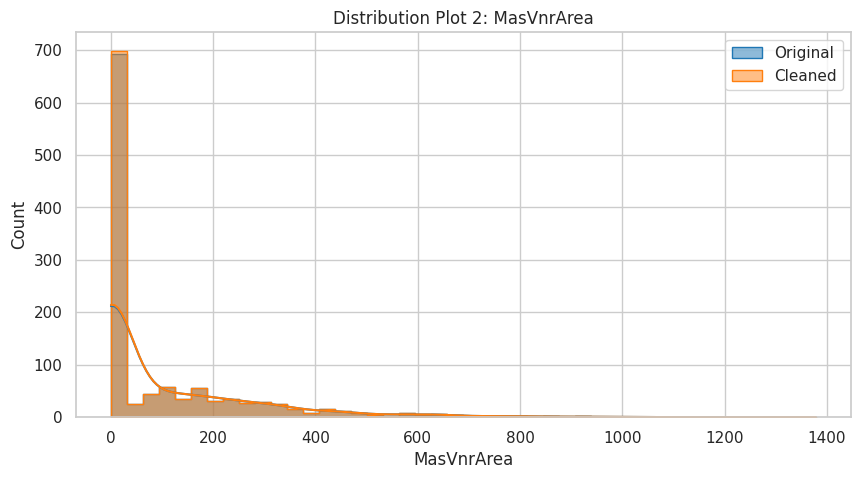

Displaying histogram for numerical variable: MasVnrArea


In [16]:
variables_median = ['2ndFlrSF' , 'MasVnrArea']
imputer = MeanMedianImputer(imputation_method='median', variables=variables_median)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_median)

Applies categorical imputation to the categorical variables 'GarageFinish' and 'BsmtFinType1' in the dataset TrainSet using CategoricalImputer. The cleaned dataset df_method is passed to the DataCleaningEffect function, which visualizes the impact of imputation by generating bar plots for categorical variables.


* Distribution Effect Analysis After Data Cleaning Method on variable: GarageFinish


/home/cistudent/.local/lib/python3.12/site-packages/feature_engine/imputation/categorical.py:232: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(X[variable]):


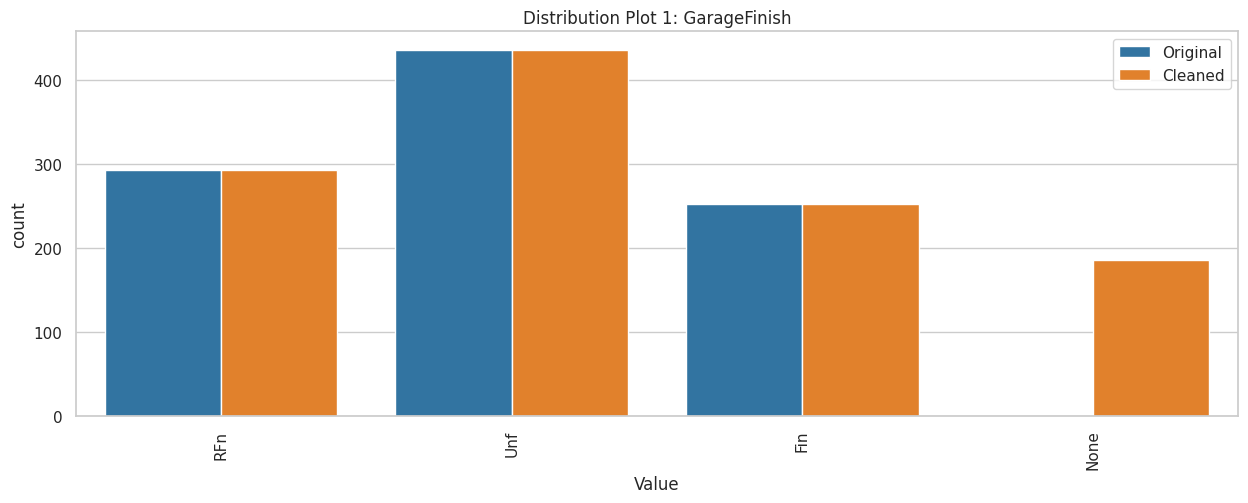

Displaying bar plot for categorical variable: GarageFinish

* Distribution Effect Analysis After Data Cleaning Method on variable: BsmtFinType1


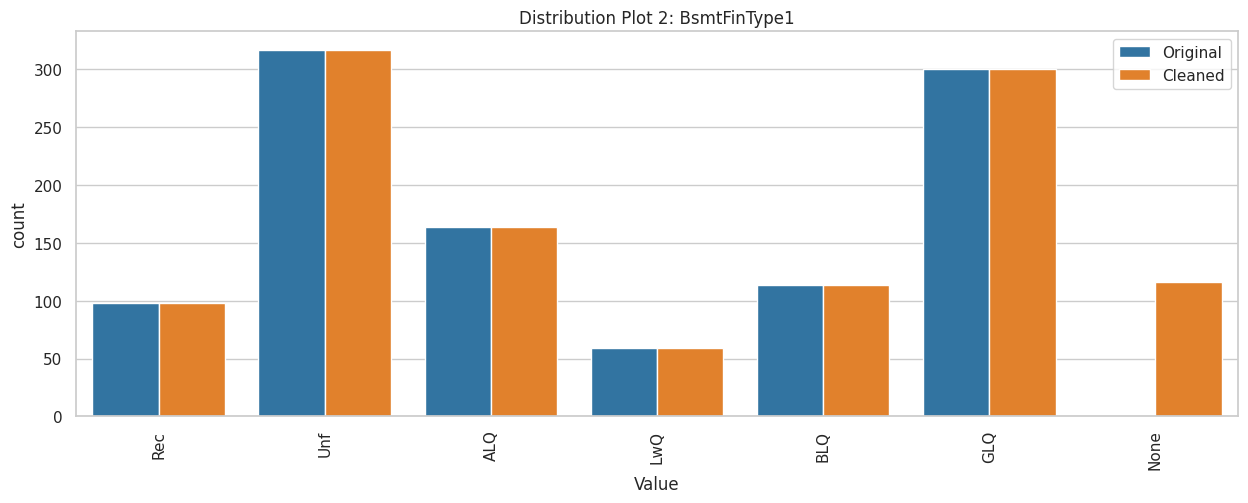

Displaying bar plot for categorical variable: BsmtFinType1


In [17]:
from feature_engine.imputation import CategoricalImputer

variables_categorical = ['GarageFinish' , 'BsmtFinType1']
imputer = CategoricalImputer(imputation_method='missing', fill_value='None', variables=variables_categorical)
df_method = imputer.fit_transform(TrainSet)
DataCleaningEffect(df_original=TrainSet,
                   df_cleaned=df_method,
                   variables_applied_with_method=variables_categorical)

The cleaning is implemented on Test, Train, and df, followed by a verification to ensure that none contain missing data.

In [18]:
from sklearn.impute import SimpleImputer

median_imputer = SimpleImputer(strategy='median')

numerical_cols_median = ['2ndFlrSF', 'MasVnrArea']

TrainSet[numerical_cols_median] = median_imputer.fit_transform(TrainSet[numerical_cols_median])
TestSet[numerical_cols_median] = median_imputer.transform(TestSet[numerical_cols_median])
df[numerical_cols_median] = median_imputer.transform(df[numerical_cols_median])

variables_to_drop = ['EnclosedPorch', 'WoodDeckSF', 'GarageFinish', 'BsmtFinType1', 'BsmtExposure', 'GarageYrBlt']

TrainSet = TrainSet.drop(columns=[col for col in variables_to_drop if col in TrainSet.columns], errors='ignore')
TestSet = TestSet.drop(columns=[col for col in variables_to_drop if col in TestSet.columns], errors='ignore')
df = df.drop(columns=[col for col in variables_to_drop if col in df.columns], errors='ignore')

mean_imputer = SimpleImputer(strategy='mean')

mean_imputation_cols = ['LotFrontage', 'BedroomAbvGr']

TrainSet[mean_imputation_cols] = mean_imputer.fit_transform(TrainSet[mean_imputation_cols])
TestSet[mean_imputation_cols] = mean_imputer.transform(TestSet[mean_imputation_cols])
df[mean_imputation_cols] = mean_imputer.transform(df[mean_imputation_cols])

Prints the count of missing (null) values in three datasets (TrainSet, TestSet, and df) after cleaning.

In [19]:
print("Missing values in TrainSet after cleaning:")
print(TrainSet.isnull().sum())

print("Missing values in TestSet after cleaning:")
print(TestSet.isnull().sum())

print("Missing values in df after cleaning:")
print(df.isnull().sum())

Missing values in TrainSet after cleaning:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtFinSF1      0
BsmtUnfSF       0
GarageArea      0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64
Missing values in TestSet after cleaning:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtFinSF1      0
BsmtUnfSF       0
GarageArea      0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPorchSF     0
OverallCond     0
OverallQual     0
TotalBsmtSF     0
YearBuilt       0
YearRemodAdd    0
SalePrice       0
dtype: int64
Missing values in df after cleaning:
1stFlrSF        0
2ndFlrSF        0
BedroomAbvGr    0
BsmtFinSF1      0
BsmtUnfSF       0
GarageArea      0
GrLivArea       0
KitchenQual     0
LotArea         0
LotFrontage     0
MasVnrArea      0
OpenPo

TrainSet is passed to the EvaluateMissingData function.

In [20]:
EvaluateMissingData(TrainSet)

,RowsWithMissingData,PercentageOfDataset,DataType


TestSet is passed to the EvaluateMissingData function.

In [21]:
EvaluateMissingData(TestSet)

,RowsWithMissingData,PercentageOfDataset,DataType


df is passed to the EvaluateMissingData function.

In [22]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType


Create the directory structure outputs/datasets/cleaned

In [23]:
import os
try:
  os.makedirs("outputs/datasets/cleaned")
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/datasets/cleaned'


Save TrainSet as a CSV file.

In [24]:
TrainSet.to_csv("outputs/datasets/cleaned/train_set_cleaned.csv", index=False)

Save TestSet as a CSV file.

In [25]:
TestSet.to_csv("outputs/datasets/cleaned/test_set_cleaned.csv", index=False)

Save df as a CSV file.

In [26]:
df.to_csv("outputs/datasets/cleaned/HousePricesCleaned.csv", index=False)

Checks for missing values in the df DataFrame.

In [27]:
import pandas as pd

df = pd.read_csv("outputs/datasets/cleaned/HousePricesCleaned.csv")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)
